In [1]:
!pip install fastai

  Using cached fastai-2.1.8-py3-none-any.whl (189 kB)
  Using cached fastcore-1.3.10-py3-none-any.whl (51 kB)
     |████████████████████████████████| 776.8 MB 83 bytes/s 
     |████████████████████████████████| 10.5 MB 55.6 MB/s 
     |████████████████████████████████| 12.8 MB 105 kB/s 
     |████████████████████████████████| 288 kB 58.2 MB/s 
     |████████████████████████████████| 1.1 MB 46.9 MB/s 
     |████████████████████████████████| 295 kB 42.4 MB/s 
     |████████████████████████████████| 9.8 MB 40.7 MB/s 


In [2]:
from fastai import *
from fastai.tabular import *
from fastai.tabular.all import *
from fastai.collab import *
import numpy as np
import pandas as pd
from pathlib import Path

In [4]:
path = Path('')

df = pd.read_csv(path/'train_290_without_low1.csv')
test = pd.read_csv(path/'test_dropped_290_without_nans.csv')
df['Culture']-=1

In [5]:
CAT_NAMES = ['0','1','2']
CONT_NAMES = list((df.drop(['0','1','2','Culture'],axis=1)).columns)
TARGET='Culture'

df[TARGET] = df[TARGET].astype('category')
for i in CAT_NAMES:
    df[i]=df[i].astype('category')
    test[i]=test[i].astype('category')

In [6]:
procs = [Categorify, Normalize]
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

dls = TabularDataLoaders.from_df(df, 
                                 y_names=TARGET, 
                                 cat_names=CAT_NAMES,
                                 cont_names=CONT_NAMES,
                                 procs=procs,
                                 splits=splits)

In [7]:
class_count_df = df.groupby(TARGET).count()
classes=pd.Series(list(class_count_df['0']))
new_weights=[]
for i in classes:
    new_weights.append((classes.sum()) / (2.0 * i))
class_weights=torch.FloatTensor(new_weights)

In [18]:
metrics = F1Score(average='weighted')
loss_func = CrossEntropyLossFlat(weight=class_weights)
learn = tabular_learner(dls,layers=[800,676], loss_func=loss_func,metrics=[metrics])

SuggestedLRs(lr_min=0.0005248074419796466, lr_steep=0.3019951581954956)

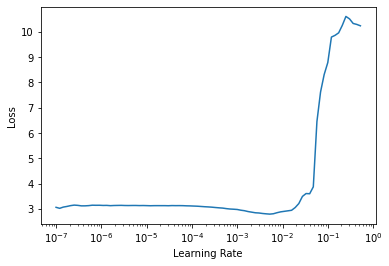

In [19]:
learn.lr_find()

In [20]:
learn.fit(n_epoch=9,lr=0.0004,wd=0.1)

epoch,train_loss,valid_loss,f1_score,time
0,2.419755,2.040132,0.489240,00:01
1,1.520815,1.524462,0.622638,00:01
2,0.877722,1.859589,0.675503,00:01
3,0.483093,1.821265,0.665938,00:01
4,0.280126,2.007777,0.693036,00:01
5,0.183007,2.178846,0.675612,00:01
6,0.127389,2.126099,0.653091,00:01
7,0.095901,2.389941,0.669616,00:01
8,0.070098,2.365491,0.695294,00:01


In [21]:
rows=[]
for i in test.index:
    row, clas, probs=learn.predict(test.iloc[i])
    rows.append(row['Culture'][0])
rows=np.asarray(rows)
rows+=1
pd.Series(rows).to_csv('fastai1.csv', index=False, header=['Culture'])

SuggestedLRs(lr_min=0.001096478197723627, lr_steep=0.0014454397605732083)

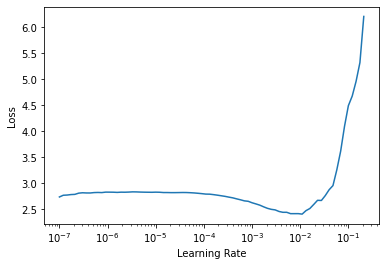

In [22]:
path = Path('')

df = pd.read_csv(path/'train_290_without_low2.csv')
test = pd.read_csv(path/'test_dropped_290_without_nans.csv')
df['Culture']-=1
CAT_NAMES = ['0','1','2']
CONT_NAMES = list((df.drop(['0','1','2','Culture'],axis=1)).columns)
TARGET='Culture'

df[TARGET] = df[TARGET].astype('category')
for i in CAT_NAMES:
    df[i]=df[i].astype('category')
    test[i]=test[i].astype('category')
  
procs = [Categorify, Normalize]
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

dls = TabularDataLoaders.from_df(df, 
                                 y_names=TARGET, 
                                 cat_names=CAT_NAMES,
                                 cont_names=CONT_NAMES,
                                 procs=procs,
                                 splits=splits)
class_count_df = df.groupby(TARGET).count()
classes=pd.Series(list(class_count_df['0']))
new_weights=[]
for i in classes:
    new_weights.append((classes.sum()) / (2.0 * i))
class_weights=torch.FloatTensor(new_weights)
metrics = F1Score(average='weighted')
loss_func = CrossEntropyLossFlat(weight=class_weights)

SuggestedLRs(lr_min=0.0006309573538601399, lr_steep=0.005248074419796467)

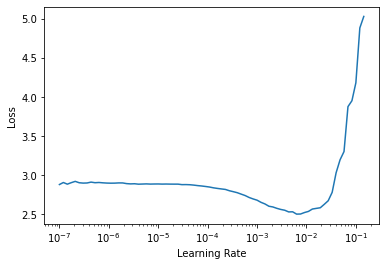

In [31]:
learn = tabular_learner(dls,layers=[800,676], loss_func=loss_func,metrics=[metrics])
learn.lr_find()

In [37]:
learn.fit(n_epoch=1,lr=0.0004,wd=0.1)#сделал так около 5-6 нажатий по одной эпохе, смотрел на f1 score, пока он не стал 0,7

epoch,train_loss,valid_loss,f1_score,time
0,0.057005,2.408762,0.704827,00:01


In [38]:
rows=[]
for i in test.index:
    row, clas, probs=learn.predict(test.iloc[i])
    rows.append(row['Culture'][0])
rows=np.asarray(rows)
rows+=1
pd.Series(rows).to_csv('fastai2.csv', index=False, header=['Culture'])